# Advanced Stable Diffusion Demo

In this notebook, we will explore the capabilities of the Stable Diffusion 3 model for text-to-image generation and the Stable Diffusion inpainting model for advanced image editing tasks. We will demonstrate these capabilities through various examples.


In [12]:
import torch
from diffusers import StableDiffusion3Pipeline, StableDiffusionInpaintPipeline
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import os
from huggingface_hub import login

# Authenticate with Hugging Face
login(token='secret')

os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


## Device Check

First, we need to check if a CUDA-enabled GPU is available for faster computation. If not, we will use the CPU.


In [10]:
# Check if CUDA (NVIDIA GPUs) is available, otherwise fallback to CPU
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


## Load Stable Diffusion Models

We will load the Stable Diffusion 3 model for text-to-image generation and the Stable Diffusion inpainting model from the Hugging Face repository and move them to the appropriate device.


In [13]:
# Load the Stable Diffusion 3 text-to-image model
model_id = "stabilityai/stable-diffusion-3-medium-diffusers"
pipe = StableDiffusion3Pipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.to(device)

# Load the Stable Diffusion inpainting model
inpaint_model_id = "runwayml/stable-diffusion-inpainting"
inpaint_pipe = StableDiffusionInpaintPipeline.from_pretrained(
    inpaint_model_id,
    revision="fp16",
    torch_dtype=torch.float16,
)
inpaint_pipe.to(device)


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


model_index.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:219: FutureWarning: You are loading the variant fp16 from runwayml/stable-diffusion-inpainting via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
safety_checker/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/635 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.75k [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/821 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/810 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/afeee10def38be19995784bcc811882409d066e5/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/afeee10def38be19995784bcc811882409d066e5/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/afeee10def38be19995784bcc811882409d066e5/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/afeee10def38be19995784bcc811882409d066e5/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/f

StableDiffusionInpaintPipeline {
  "_class_name": "StableDiffusionInpaintPipeline",
  "_diffusers_version": "0.29.0",
  "_name_or_path": "runwayml/stable-diffusion-inpainting",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## Define Image Generation Function

We define a function `generate_image` that takes a text prompt and guidance scale as inputs and returns a generated image. The guidance scale controls how closely the generated image matches the prompt.


In [14]:
# Function to generate and display image based on the prompt
def generate_image(prompt, negative_prompt="", num_inference_steps=28, guidance_scale=7.0):
    image = pipe(prompt, negative_prompt=negative_prompt, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale).images[0]
    return image


## Example: Generating an Image from a Prompt

Let's generate an image using a specific text prompt and guidance scale to showcase the capabilities of the Stable Diffusion 3 model.


  0%|          | 0/28 [00:00<?, ?it/s]

Passing `scale` via `joint_attention_kwargs` when not using the PEFT backend is ineffective.
Passing `scale` via `joint_attention_kwargs` when not using the PEFT backend is ineffective.
Passing `scale` via `joint_attention_kwargs` when not using the PEFT backend is ineffective.
Passing `scale` via `joint_attention_kwargs` when not using the PEFT backend is ineffective.
Passing `scale` via `joint_attention_kwargs` when not using the PEFT backend is ineffective.
Passing `scale` via `joint_attention_kwargs` when not using the PEFT backend is ineffective.
Passing `scale` via `joint_attention_kwargs` when not using the PEFT backend is ineffective.
Passing `scale` via `joint_attention_kwargs` when not using the PEFT backend is ineffective.
Passing `scale` via `joint_attention_kwargs` when not using the PEFT backend is ineffective.
Passing `scale` via `joint_attention_kwargs` when not using the PEFT backend is ineffective.
Passing `scale` via `joint_attention_kwargs` when not using the PEFT b

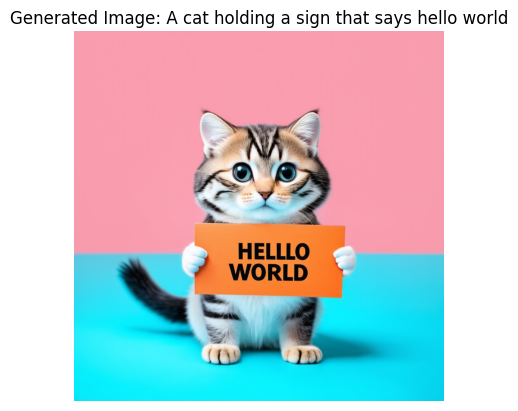

In [15]:
# Example prompt and parameters
prompt = "A cat holding a sign that says hello world"
negative_prompt = ""
num_inference_steps = 28
guidance_scale = 7.0

# Generate and display the image
image = generate_image(prompt, negative_prompt, num_inference_steps, guidance_scale)
plt.imshow(image)
plt.axis("off")
plt.title(f"Generated Image: {prompt}")
plt.show()


## Define Inpainting Function

We define a function `inpaint_image` that takes an image, a mask, a text prompt, and guidance scale as inputs, and returns an inpainted image. The guidance scale controls how closely the inpainted image matches the prompt.


In [23]:
# Function to perform inpainting
def inpaint_image(init_image, mask_image, prompt, guidance_scale=7.5):
    result = inpaint_pipe(prompt=prompt, image=init_image, mask_image=mask_image, guidance_scale=guidance_scale)
    return result.images[0]


## Example: Inpainting with Random Images

We will use random images from LoremFlickr to demonstrate the inpainting capabilities of the Stable Diffusion model. LoremFlickr provides random images of specified categories, which we can use for our inpainting tasks.


  0%|          | 0/50 [00:00<?, ?it/s]

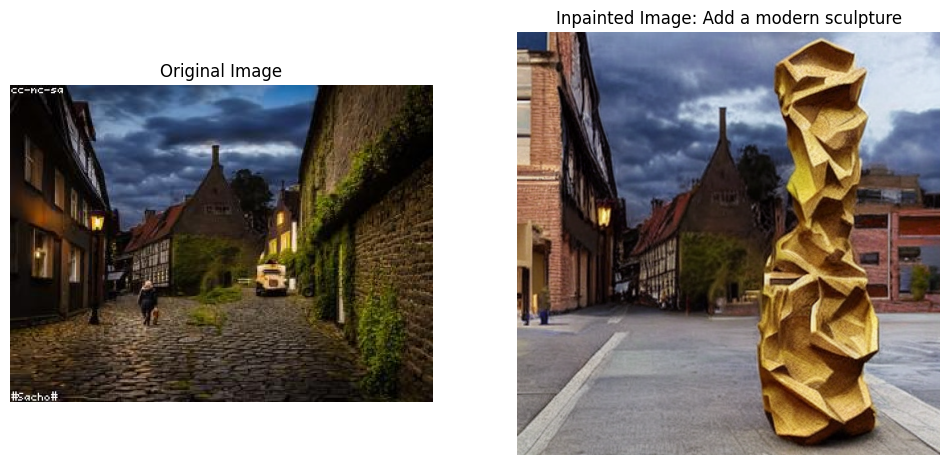

In [27]:
# Fetch a random image from LoremFlickr
def fetch_random_image(category="city"):
    url = f"https://loremflickr.com/320/240/{category}"
    response = requests.get(url)
    return Image.open(BytesIO(response.content)).convert("RGB")

# Example usage of inpainting to add an element to an urban scene
init_image = fetch_random_image("city")
mask_image = Image.new("RGB", init_image.size, (255, 255, 255))
mask_image.paste((0, 0, 0), [50, 50, 200, 150])  # Create a black rectangle as a mask

# Define a new prompt for the masked area
inpainting_prompt = "Add a modern sculpture"

# Perform inpainting
inpainted_image = inpaint_image(init_image, mask_image, inpainting_prompt, guidance_scale=7.5)

# Display the original and inpainted images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(init_image)
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(inpainted_image)
plt.axis("off")
plt.title(f"Inpainted Image: {inpainting_prompt}")

plt.show()

## Conclusion

In this notebook, we demonstrated the capabilities of the Stable Diffusion 3 model for text-to-image generation and the Stable Diffusion inpainting model for advanced image editing tasks. These techniques allow us to create and modify images based on text prompts and masks, showcasing the versatility and power of Stable Diffusion models.
